<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Laboratorio II Procesamiento de señales</p>
          
<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Procesamiento de Señales Biomédicas</p>
<br>
<h1>Descripción del dataset:</h1>



<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Para el desarrollo de este laboratorio se hará uso del dataset "Pulse Transit Time PPG Dataset" en el cuál se presentan diferentes señales biomédicas registradas para diferentes pacientas realizando diferentes activadades. se cuenta con las siguientes señales:
</div>
<br>
<div style="text-align: justify;width:60%;margin: 0 auto"> 
<ul>
        <li> ecg: 3-lead ECG captured at 500Hz
        <li> peaks: CSV ONLY, annotated in WFDB. The annotated ECG R peak (1 = peak, 0 = no peak)
        <li> pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)
        <li> lc_1: TAL221 load cell proximal phalanx (first segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> lc_2: TAL221 load cell (base segment) PPG sensor attachment pressure (arbitrary units, 80Hz)
        <li> temp_1: distal phalanx (first segment) PPG sensor temperature (°C, 10Hz)
        <li> temp_2: proximal phalanx (base segment) PPG sensor temperature in (°C, 10Hz)
        <li> temp_3: InvenSenseMPU-9250 IMU temperature (°C, 500Hz)
        <li> a_x: InvenSenseMPU-9250 IMU acceleration in x-direction (g, 500Hz)
        <li> a_y: InvenSenseMPU-9250 IMU acceleration in y-direction (g, 500Hz)
        <li> a_z: InvenSenseMPU-9250 IMU acceleration in z-direction (g, 500Hz)
        <li> g_x: InvenSenseMPU-9250 IMU angular velocity around x-axis (°/s, 500Hz)
        <li> g_y: InvenSenseMPU-9250 IMU angular velocity around y-axis (°/s, 500Hz)
        <li> g_z: InvenSenseMPU-9250 IMU angular velocity around z-axis (°/s, 500Hz)

</ul>
</div>

Por ejemplo para el sujeto de prueba s1 se presenta la lectura de los datos registrados en la actividad de correr:

In [1]:
from pathlib import Path
import pandas as pd 

def get_data(subject="s10",activity="run"):
    cwd=Path.cwd()

    DATA_DIR=cwd/"data"

    df=pd.read_csv(DATA_DIR/f"{subject}_{activity}.csv")
    
    return df
df=get_data(subject="s10",activity="run")

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,3)

def plot_signal(x,y):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.

    ax.plot(x,y)  # Plot some data on the axes.

    
    plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.3)
    plt.grid(visible=True, which='minor', color='k', linestyle='-',alpha=0.1)
    plt.minorticks_on()


def display_signal(t_inicial=300,signal="ecg"):
    N=2000
    Ts=0.002
    n_ini=int(t_inicial/Ts)
    t=np.arange(0,N+1)*Ts+t_inicial
    plot_signal(t,df.loc[n_ini:n_ini+N,signal])
    plt.title(signal)
    plt.xlim([0+t_inicial,N*Ts+t_inicial])
    plt.xlabel("time[sec]")
    # return x
interact(display_signal, t_inicial=widgets.IntSlider(min=0,max=400,step=1,value=300),signal=df.columns[1:]);

interactive(children=(IntSlider(value=300, description='t_inicial', max=400), Dropdown(description='signal', o…

In [9]:
def get_sample_period_and_freq(df):
    """ Function that calculates the mean max min sample period of the signal"""
    
    Ts_mean=pd.to_datetime(df["time"]).diff().shift(-1).mean().total_seconds()
    Ts_max=pd.to_datetime(df["time"]).diff().shift(-1).max().total_seconds()
    Ts_min=pd.to_datetime(df["time"]).diff().shift(-1).min().total_seconds()
    print(f"Ts_mean= {Ts_mean},Ts_max= {Ts_max},Ts_min= {Ts_min}")
    Fs=1/Ts_mean
    return Fs,Ts_mean
Fs, Ts = get_sample_period_and_freq(df)
print(f"Signal with sample period of {Ts} [sec] and sample frequency of {Fs}[Hz]")

Ts_mean= 0.002,Ts_max= 0.002001,Ts_min= 0.002
Signal with sample period of 0.002 [sec] and sample frequency of 500.0[Hz]


In [10]:
df.columns

Index(['time', 'ecg', 'peaks', 'pleth_1', 'pleth_2', 'pleth_3', 'pleth_4',
       'pleth_5', 'pleth_6', 'lc_1', 'lc_2', 'temp_1', 'temp_2', 'temp_3',
       'a_x', 'a_y', 'a_z', 'g_x', 'g_y', 'g_z'],
      dtype='object')

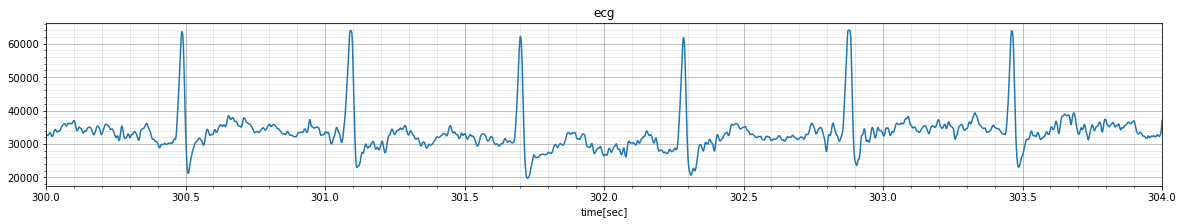

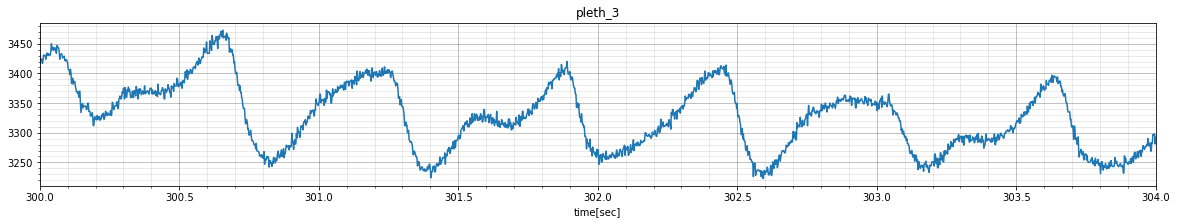

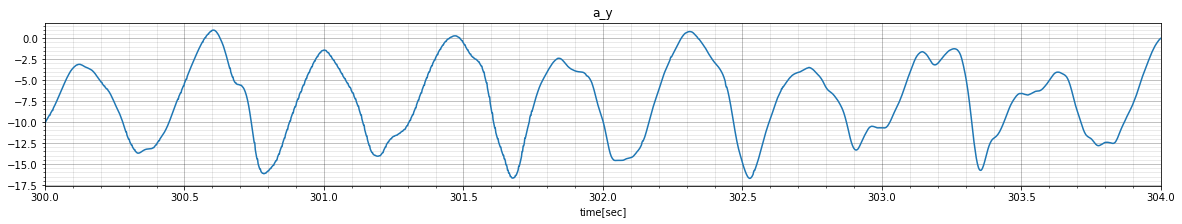

In [11]:
display_signal(t_inicial=300,signal="ecg")
display_signal(t_inicial=300,signal="pleth_3")
display_signal(t_inicial=300,signal="a_y")

# Aplicación de la transformada Wavelet

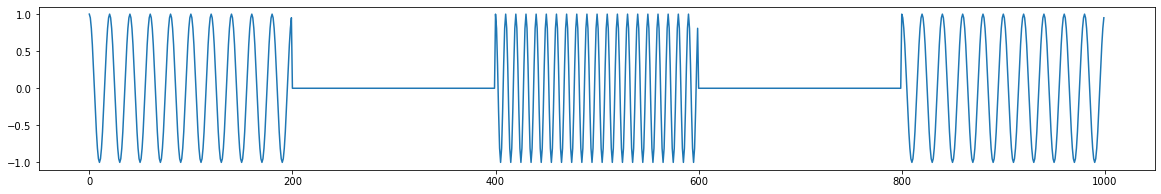

In [23]:
from pywt import wavedec
#x=df.loc[:,"ecg"]
t=np.arange(0,2,0.01)
#coeffs = wavedec(x, 'db1', level=4)
x=np.concatenate([
    np.cos(2*np.pi*5*t),
    np.zeros(len(t)),
    np.cos(2*np.pi*10*t),
    np.zeros(len(t)),
    np.cos(2*np.pi*5*t)])
plt.plot(x)

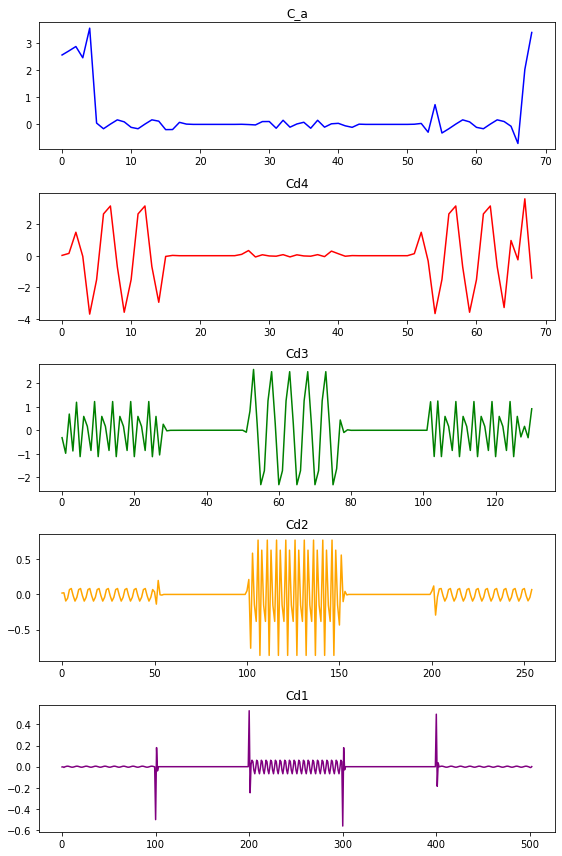

In [18]:
coeffs = wavedec(x, 'db4', level=4)
# Create a figure and a grid of subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))  # 5 rows of subplots

# Plot data on the first subplot
axs[0].plot(coeffs[0], color='blue')
axs[0].set_title('C_a')

# Plot data on the second subplot
axs[1].plot(coeffs[1], color='red')
axs[1].set_title('Cd4')

# Plot data on the third subplot
axs[2].plot(coeffs[2], color='green')
axs[2].set_title('Cd3')

# Plot data on the fourth subplot
axs[3].plot(coeffs[3], color='orange')
axs[3].set_title('Cd2')

# Plot data on the fifth subplot
axs[4].plot(coeffs[4], color='purple')
axs[4].set_title('Cd1')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
import scipy.signal as sg


coeffs=np.array([sg.resample(coeff,500) for coeff in coeffs])
corr=coeffs@coeffs.T

503

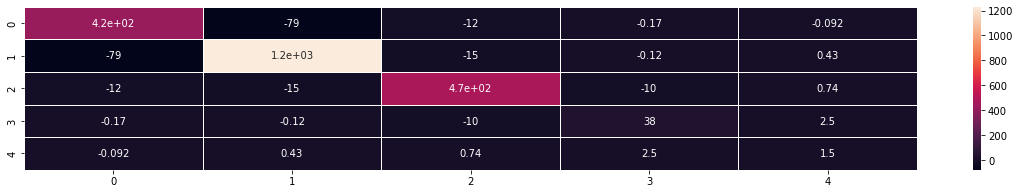

In [16]:
import seaborn as sns
ax = sns.heatmap(corr, linewidth=0.5,annot=True)
plt.show()

In [40]:
def get_wavelet_correlation_modes(x,plot):
    coeffs = wavedec(x, 'db4', level=4)

    coeffs=np.array([sg.resample(coeff,len(coeffs[-1])) for coeff in coeffs])
    corr=coeffs@coeffs.T
    if plot:
        # Create a figure and a grid of subplots
        fig, axs = plt.subplots(6, 1, figsize=(8, 12))  # 5 rows of subplots

        # Plot data on the first subplot
        axs[0].plot(coeffs[0], color='blue')
        axs[0].set_title('C_a')

        # Plot data on the second subplot
        axs[1].plot(coeffs[1], color='red')
        axs[1].set_title('Cd4')

        # Plot data on the third subplot
        axs[2].plot(coeffs[2], color='green')
        axs[2].set_title('Cd3')

        # Plot data on the fourth subplot
        axs[3].plot(coeffs[3], color='orange')
        axs[3].set_title('Cd2')

        # Plot data on the fifth subplot
        axs[4].plot(coeffs[4], color='purple')
        axs[4].set_title('Cd1')

        axs[5] = sns.heatmap(corr, linewidth=0.5,annot=True)
        # Adjust layout to prevent overlapping
        plt.tight_layout()

        # Show the plot
        plt.show()
    return corr

<p style="font-size: 20px;
text-align:center;
font-family: 'Times New Roman';
font-variant: small-caps;
font-weight: italic;
line-height: 50px;">Correlacion Cruzada para dos señales distintas </p>
<br>

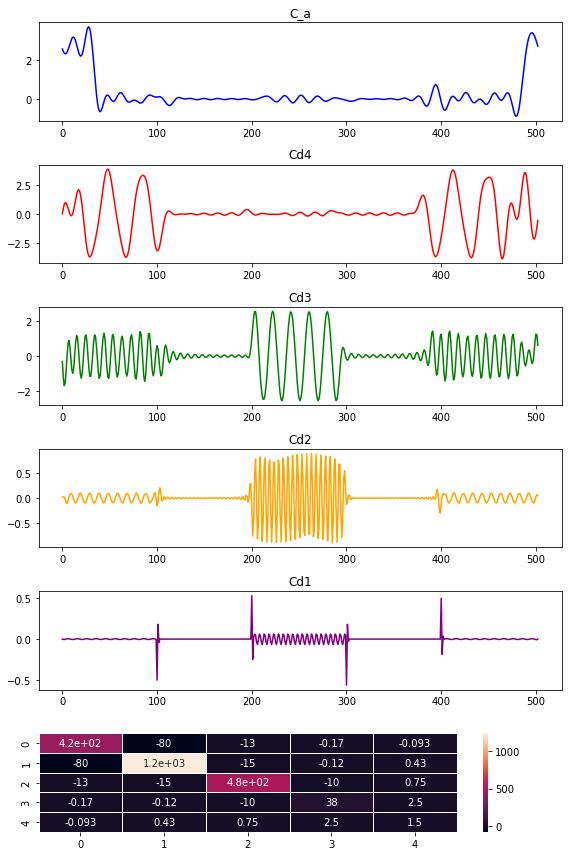

In [28]:
get_wavelet_correlation_modes(x,plot=True)

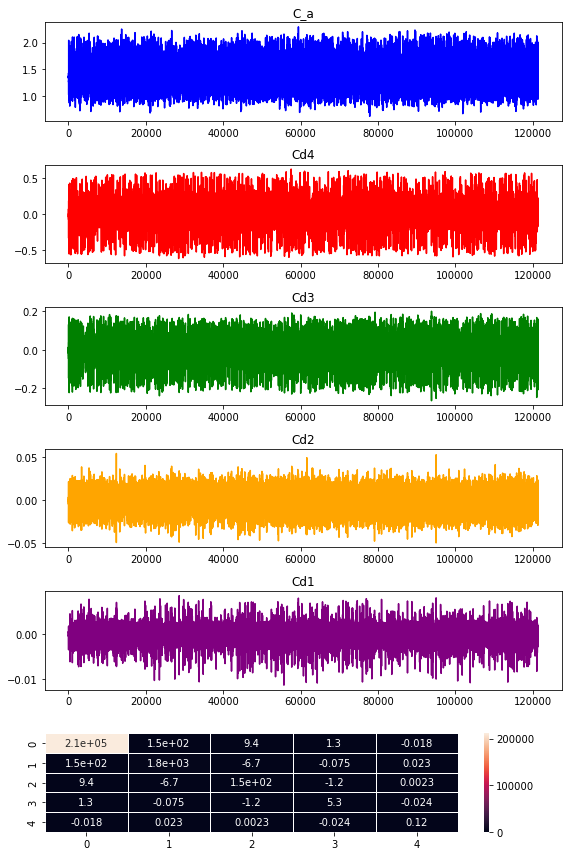

array([[ 2.11274236e+05,  1.45487765e+02,  9.43258786e+00,
         1.27759296e+00, -1.80182146e-02],
       [ 1.45487765e+02,  1.78173790e+03, -6.66220684e+00,
        -7.53395785e-02,  2.29763212e-02],
       [ 9.43258786e+00, -6.66220684e+00,  1.52333512e+02,
        -1.24745947e+00,  2.32218066e-03],
       [ 1.27759296e+00, -7.53395785e-02, -1.24745947e+00,
         5.25096514e+00, -2.38488449e-02],
       [-1.80182146e-02,  2.29763212e-02,  2.32218066e-03,
        -2.38488449e-02,  1.23953168e-01]])

In [41]:
get_wavelet_correlation_modes(df["ecg"]/100_000,plot=True)

In [97]:
corr=get_wavelet_correlation_modes(df["ecg"],plot=False)
corr1=np.reshape(corr, -1, order='C')

In [100]:
corr2=get_wavelet_correlation_modes(df["a_x"],plot=False)
corr2=np.reshape(corr2, -1, order='C')

np.hstack((corr1,corr2))

array([ 2.11274236e+15,  1.45487765e+12,  9.43258786e+10,  1.27759296e+10,
       -1.80182146e+08,  1.45487765e+12,  1.78173790e+13, -6.66220684e+10,
       -7.53395785e+08,  2.29763212e+08,  9.43258786e+10, -6.66220684e+10,
        1.52333512e+12, -1.24745947e+10,  2.32218066e+07,  1.27759296e+10,
       -7.53395785e+08, -1.24745947e+10,  5.25096514e+10, -2.38488449e+08,
       -1.80182146e+08,  2.29763212e+08,  2.32218066e+07, -2.38488449e+08,
        1.23953168e+09,  6.97298404e+07,  1.24024069e+03, -1.36086546e+02,
        8.34281020e+01, -7.90026893e+01,  1.24024069e+03,  5.11841821e+03,
        1.41208902e+01,  1.15569020e+00, -1.07422243e+00, -1.36086546e+02,
        1.41208902e+01,  2.57438168e+02, -1.36712259e+00, -5.95219692e-02,
        8.34281020e+01,  1.15569020e+00, -1.36712259e+00,  6.59733346e+01,
        4.02094339e-02, -7.90026893e+01, -1.07422243e+00, -5.95219692e-02,
        4.02094339e-02,  3.47108948e+01])

In [103]:
def get_total_acc(df):
    acc=np.sqrt(df["a_x"]**2+df["a_y"]**2+df["a_z"]**2)
    return acc

In [104]:
def extract_features():
    cwd=Path.cwd()
    
    DATA_DIR=cwd/"data"
    out={}
    out_y={}
    activity_dict={"run":1,"walk":0,"sit":-1}
    for subject in [f"s{x}" for x in range(1,23)]:
        for activity in ["walk","run","sit"]:
            df=pd.read_csv(DATA_DIR/f"{subject}_{activity}.csv")
            corr1=get_wavelet_correlation_modes(df["ecg"],plot=False)
            
            corr2=get_wavelet_correlation_modes(get_total_acc(df),plot=False)
            
            corr_out = np.hstack((
                np.reshape(corr1, -1, order='C'),
                np.reshape(corr2, -1, order='C')
            ))
            
            out[f"{subject}_{activity}"]=corr_out
            
            out_y[f"{subject}_{activity}"]=activity_dict[activity]
    return out,out_y

In [105]:
out_x,out_y=extract_features()

In [106]:
df_x=pd.DataFrame.from_dict(out_x,orient="index")
df_y=pd.DataFrame.from_dict(out_y,orient="index",columns=["out"])
df_wcm=pd.merge(df_y, df_x, left_index=True, right_index=True)
df_wcm

,out,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
s1_walk,0,2.179986e+15,1.905237e+12,-2.831943e+10,-7.303060e+09,1.629147e+09,1.905237e+12,1.864201e+13,-7.304170e+10,2.271112e+09,...,54.281292,-0.600158,16.943849,153.448418,-0.559675,-75.163158,3.766907,3.761390,-0.559675,34.206614
s1_run,1,2.179092e+15,1.248652e+12,-1.054884e+10,-1.308035e+09,2.362983e+08,1.248652e+12,8.878139e+12,-2.748327e+10,1.118775e+09,...,3.630570,1.785354,0.473559,25.727849,-0.265112,45.784504,0.671264,0.043021,-0.265112,12.246175
s1_sit,-1,2.207753e+15,2.341106e+12,-9.443643e+10,4.726048e+09,-5.936800e+08,2.341106e+12,1.217801e+13,-2.281836e+10,3.334957e+09,...,162.738631,-0.110034,-0.086526,13.363207,-0.040033,13.103473,0.011059,0.023274,-0.040033,2.279198
s2_walk,0,2.143277e+15,-1.456463e+12,-5.404886e+10,5.849392e+09,-6.123772e+08,-1.456463e+12,1.713866e+13,-1.171165e+09,-1.499891e+09,...,-59.549483,1.825905,-1.033436,13.891925,-0.159253,79.503014,-0.003951,0.099601,-0.159253,4.990381
s2_run,1,2.206401e+15,9.383945e+11,1.464615e+10,-1.587223e+10,1.587847e+08,9.383945e+11,2.137980e+13,-2.474058e+10,6.038491e+08,...,-766.434915,-7.774031,-7.357334,73.454563,0.374393,-175.770850,0.191935,-0.892587,0.374393,52.996952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s21_run,1,2.105161e+15,1.426268e+12,2.404351e+10,-8.405515e+09,-4.866014e+08,1.426268e+12,1.147170e+13,-3.216342e+10,1.441446e+09,...,26.241142,-3.975268,0.173408,21.038187,-0.032672,-3.925323,0.407000,-0.202765,-0.032672,15.155745
s21_sit,-1,2.129937e+15,9.533869e+11,-3.579324e+10,3.571449e+09,-3.623820e+08,9.533869e+11,1.072879e+13,-2.450205e+10,3.137480e+08,...,-42.259753,-0.116591,-0.078233,14.588183,-0.027323,-13.780210,-0.033347,-0.021595,-0.027323,2.523502
s22_walk,0,2.109000e+15,1.555759e+12,9.543270e+10,-1.431533e+10,2.323891e+09,1.555759e+12,1.822305e+13,-1.589018e+10,2.868689e+09,...,-42.169864,0.172247,0.578041,10.130864,0.046544,-95.581653,-0.885828,0.436426,0.046544,2.874856
s22_run,1,2.133841e+15,1.977316e+12,-4.327015e+10,1.572375e+10,1.845681e+09,1.977316e+12,1.887591e+13,-3.905047e+10,1.859489e+09,...,-77.569923,-6.000721,-1.591074,21.761365,0.136147,-89.739335,0.565757,-0.182385,0.136147,13.726098


In [107]:
df_wcm.to_csv("wcm.csv")

# Referencias 

<br>
<div style="text-align: justify;width:90%;margin: 0 auto"> 
[1]. Mehrgardt, P., Khushi, M., Poon, S., & Withana, A. (2022). Pulse Transit Time PPG Dataset (version 1.1.0). PhysioNet. https://doi.org/10.13026/jpan-6n92. <br><br>
[2] Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.. <br><br>

</div>